In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sequences = pd.read_csv('20_sequence.csv')
sequences.head()

,sequence,name
0,acttaagtaccttatctatctacagatagaaaagttgctttttaga...,1
1,attaaaggtttataccttcccaggtaacaaaccaaccaactttcga...,1
2,cttaaagaatttttctatctatagatagagaattttcttatttaga...,1
3,atattaggtttttacctacccaggaaaagccaaccaacctcgatct...,1
4,attgtgagcgatttgcgtgcgtgcatcccgcttcactgatctcttg...,1


In [ ]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [ ]:
sequences['sequence'] = sequences.apply(lambda x: getKmers(x['sequence']), axis=1)

In [ ]:
sequences.head()

,sequence,name
0,"[acttaa, cttaag, ttaagt, taagta, aagtac, agtac...",1
1,"[attaaa, ttaaag, taaagg, aaaggt, aaggtt, aggtt...",1
2,"[cttaaa, ttaaag, taaaga, aaagaa, aagaat, agaat...",1
3,"[atatta, tattag, attagg, ttaggt, taggtt, aggtt...",1
4,"[attgtg, ttgtga, tgtgag, gtgagc, tgagcg, gagcg...",1


In [ ]:
sequence_texts = list(sequences['sequence'])
for item in range(len(sequence_texts)):
    sequence_texts[item] = ' '.join(sequence_texts[item])                        

In [ ]:
y_data = sequences.iloc[:, 1].values 
print(y_data)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(sequence_texts)

In [ ]:
print(X.shape)

(27, 184736)


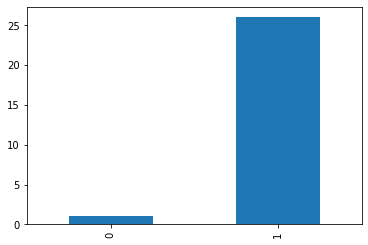

In [ ]:
sequences['name'].value_counts().sort_index().plot.bar()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_data,
                                                    test_size = 0.20, 
                                                    random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(21, 184736)
(6, 184736)


In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer
# y_train = MultiLabelBinarizer(sparse_output=True).fit_transform(y_train)
# print(y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    return accuracy, precision
accuracy, precision = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision))

Confusion matrix

Predicted  0  1
Actual         
1          1  5
accuracy = 0.833 
precision = 1.000 
recall = 0.833 
f1 = 0.909


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
